# Analysis of Distances in Prosite

In [72]:
import pandas as pd
import seaborn as sns

In [63]:
ptrns = pd.read_csv("data/PATTERNS/prosite_patterns_no_anchors.tsv",sep="\t")

In [64]:
def extract_min_max(quantifier, ds):
    quantifier = quantifier.strip('x')
    quantifier = quantifier.strip('(')
    quantifier = quantifier.strip(')')
    span = quantifier.split(",")
    low = int(span[0])
    high = int(span[1])
    for d in range(low, high+1):
        ds.append(d)

In [65]:
def extract_distance(quantifier):
    quantifier = quantifier.strip('x')
    quantifier = quantifier.strip('(')
    quantifier = quantifier.strip(')')
    return int(quantifier)

In [66]:
def parse_tokens(tokens, dists):
    for tkn in tokens:
        if 'x' in tkn:
            if tkn == 'x':
                dists.append(1)
                continue
            elif "," not in tkn:
                dists.append(extract_distance(tkn))
                continue
            extract_min_max(tkn, dists)            

In [67]:
distances = []
for i, row in ptrns.iterrows():
    ptkns = row["PATTERN"].split('-')
    parse_tokens(ptkns, distances)

Text(0.5, 1.0, 'Distribution of Prosite Pattern Distances')

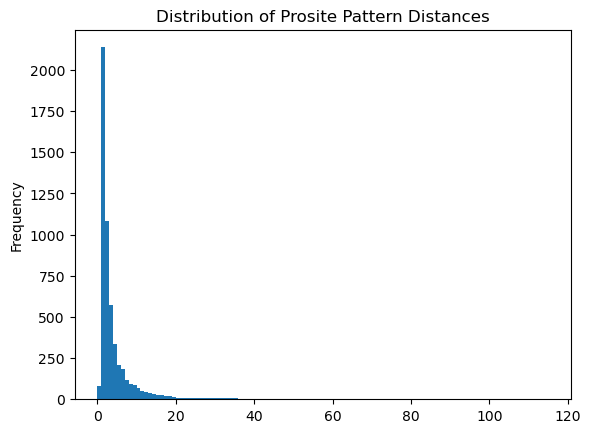

In [79]:
dist_series = pd.Series(distances, name="Prosite Distances")
dist_series.plot.hist(bins=115).set_title("Distribution of Prosite Pattern Distances")

In [71]:
pd.Series(distances).describe()

count    5459.000000
mean        5.032057
std        11.255123
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max       115.000000
dtype: float64

In [83]:
sum(dist_series.between(0, 64))/dist_series.size

0.987909873603224

In [87]:
sum(dist_series.between(65, 120))

66